# Plus del ejercicio anterior (Tarea3) "puesto que resolvía practicamente lo relacionado al ejercico a y b"

Tal vez no sea lo más práctico lo realizado en el ejercicio anterior, recapitulando:
Tomamos nuestros datos y los entrenamos dos veces (siguiendo la secuencia de -> tabla.png de la Tarea3 o carpeta ima), es decir, primero unos datos, luego otros hasta llegar a la salida.
¿Que tal si solo agregando los datos de entrada y salida, sin pasos intermedios obtengo la predicción correspondiente?. Para esto vamos a implemenar otro tipo de red neuronal "Feed Forward".

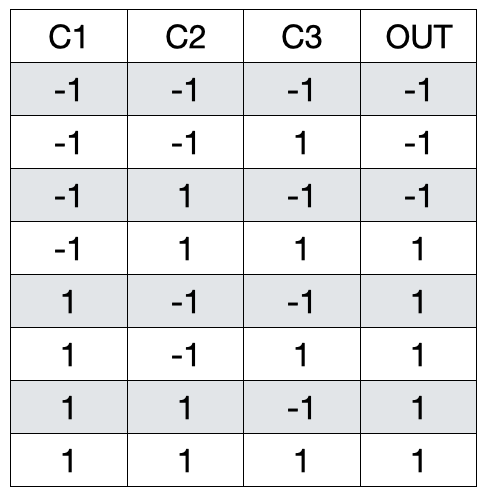

In [1]:
from IPython.display import Image
Image(filename='./images/dataset2.png', width=280)

### Datos de entrada y salida del dataset2.png

In [2]:
import numpy as np

# Datos-entrada[C1,C2,C3]
X = np.array([[-1, -1,  -1], 
               [-1, -1,   1], 
               [-1,  1,  -1], 
               [-1,  1,   1], 
               [1,  -1,  -1], 
               [1,  -1,   1], 
               [1,   1,  -1], 
               [1,   1,   1]])

# Datos-salida[OUT] -> C AND (C2 OR C3)
y = np.array([[-1, -1, -1, 1, 1, 1, 1, 1]]).T

# Especificamos que los números aleatorios generados sean exactamente los mismos
np.random.seed(1)

### Función sigmoide para activación / inicializamos los pesos:

In [3]:
# Función sigmoide
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

# Inicializamos los pesos al azar
# vamos a dejar valor de media 0
# Temenos una matriz de peso para conectar las capas (son 2: entrada y salida)
# (3,8) --> tres entradas, 8 datos
# (8,1) --> 8 datos, 1 salida
syn0 = 2*np.random.random((3,8)) - 1
syn1 = 2*np.random.random((8,1)) - 1

### Feed Forward (FF)

In [4]:
for j in range(60000):

    # "Feed forward (FF)"
    # l0 -> primera capa
    # l1 -> segunda capa (capa oculta)
    # l2 -> Capa final de la red (hipótesis)
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # Cantidad que la red neuronal "perdió"
    # (datos reales-datos predecidos)
    l2_error = y - l2
         
    # Error l2 de la red escalado por la confianza
    # ¿Estábamos realmente seguros? si es así, no cambies demasiado.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # Error en la capa media (oculta)
    l1_error = l2_delta.dot(syn1.T)
    
    # Error l1 de la red escalada por la confianza
    # ¿Estábamos realmente seguros? si es así, no cambies demasiado.
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    # Actualizamos los pesos
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print("Datos predecidos")
print(l2)

Datos predecidos
[[9.95909593e-07]
 [6.22626347e-06]
 [6.24393645e-06]
 [9.96956285e-01]
 [9.97095029e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]


Al parecer podemos distinguir la clase por el valor de la predicción. Los tres primeros valores están en el orden de e-06(07) y los restantes se aproximan a uno.
Para obtener algo más parecido a nuestra salida podemos hacer una especie de normalización o barrida (procesamiento de la predicción) de los datos como lo siguiente.

In [5]:
# Procesamiento de predicción
for x in range(len(l2)):
    if l2[x]>0.9:
        l2[x] = 1
    if l2[x]<0.1:
        l2[x] = -1
        
print("Datos reales") 
print(y)
print("\n")
print("Datos predecidos")
print(l2)

print("\n")
print("Perfecto 👍🏼, Logramos realizar la clasificación.")

Datos reales
[[-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]


Datos predecidos
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


Perfecto 👍🏼, Logramos realizar la clasificación.


**Nota:** No agrego las regiones de desición para no ser redundate (retomar ejercicio anterior "Tarea3"), prácticamente obtendriamos un resultado similar a la linea 17.

**La idea es mostrar que se puede quizas aliviar esfuerzos utilizando diferentes topologías de una red neuronal.**

##  ¿En que otras aplicaciones podría utilizar una red neuronal?

Aunque por el momento la cantidad es finita, me es dificil nombrar un sin número de aplicaciones. Por lo tanto algunas de estas son:

* Detección de plagas en cultivos
* Filtros en señales portadoras de información
* Detección de patrones (números, letras ...)
* ...
* Y en genral todo lo que tiene que ver con **Asociación y clasificación, predicción y optimización.**